# Image Processing Tutorial
1. [Introduction](#intro)
    - [What is FITS Images?](#fitsfits)
    - [How to read FITS in python?](#readfits)
    - [How to visualize FITS using matplotlib?](#visfits)
    - [Basic Image Operation](#basic)
2. [Feature Identification](#feature)
   - [What are these features?](#features)
   - [Feature Identification Technique](#identification)
   - [Morphological Operation](#morphology) 

## 1. Introduction <a name="intro"></a>

### $\bullet$ What is FITS Image?<a name="fitsfits"></a>

### $\bullet$ How to read FITS images?<a name="readfits"></a>

In [57]:
def about_array(array):
    print(f"{'Dimension of array:':>25} {array.ndim}")
    print(f"{'Size of array:':>25} {array.shape[0]} X {array.shape[1]}")

# Import necessary libararies
import astropy.io.fits as asfit

# Data files downloaded from google drive
file1="/Users/bjha/Data/winterschooldata/Wl_19370423T0801.fits"
hdu  = asfit.open(file1)
data_wl = hdu[0].data
hdr_wl  = hdu[0].header 
hdu.close()

# Data files downloaded from google drive
file1="/Users/bjha/Data/winterschooldata/hmi.M_720s.20231217_231200_TAI.3.magnetogram.fits"
hdu  = asfit.open(file1)
data_los = hdu[1].data
hdr_los  = hdu[1].header
hdu.close()

about_array(data_wl)
about_array(data_los)

      Dimension of array: 2
           Size of array: 4096 X 4096
      Dimension of array: 2
           Size of array: 4096 X 4096


### $\bullet$ How to visualize FITS images?<a name="visfits"></a>

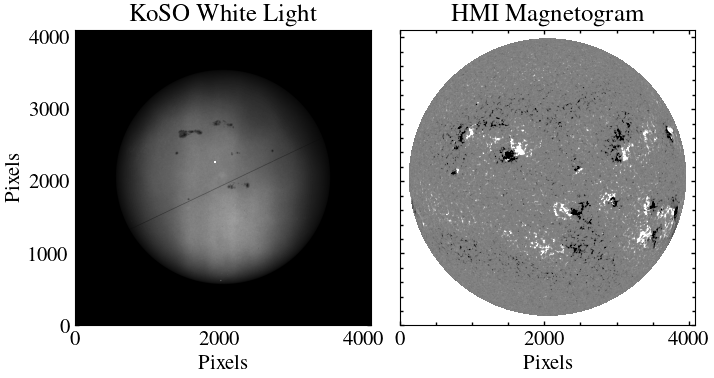

In [58]:
# Import necessary libararies
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("bkj_style.mplstyle")

# Plot Images

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4), sharey=True)
plt.subplots_adjust(wspace=0.1)

# Plot White Light
ax1.imshow(data_wl, origin="lower", cmap="gray")
ax1.set(xlabel="Pixels", ylabel="Pixels", title="KoSO White Light")

# Plot Magnetogram

r=1

#mask the disk
x, y = np.meshgrid(np.arange(4096),np.arange(4096))
r = np.hypot(x-hdr_los["CRPIX1"], y-hdr_los["CRPIX2"])
r[r>hdr_los["RSUN_OBS"]/hdr_los["CDELT1"]]=np.nan
r[r<hdr_los["RSUN_OBS"]/hdr_los["CDELT1"]]=1


ax2.imshow(data_los*r, origin="lower", cmap="gray", vmax=100, vmin=-100)
ax2.set(xlabel="Pixels", title="HMI Magnetogram")


plt.show()

### Basic Image Operation<a name="basic"></a>

[Text(0.5, 1.0, 'non-linear')]

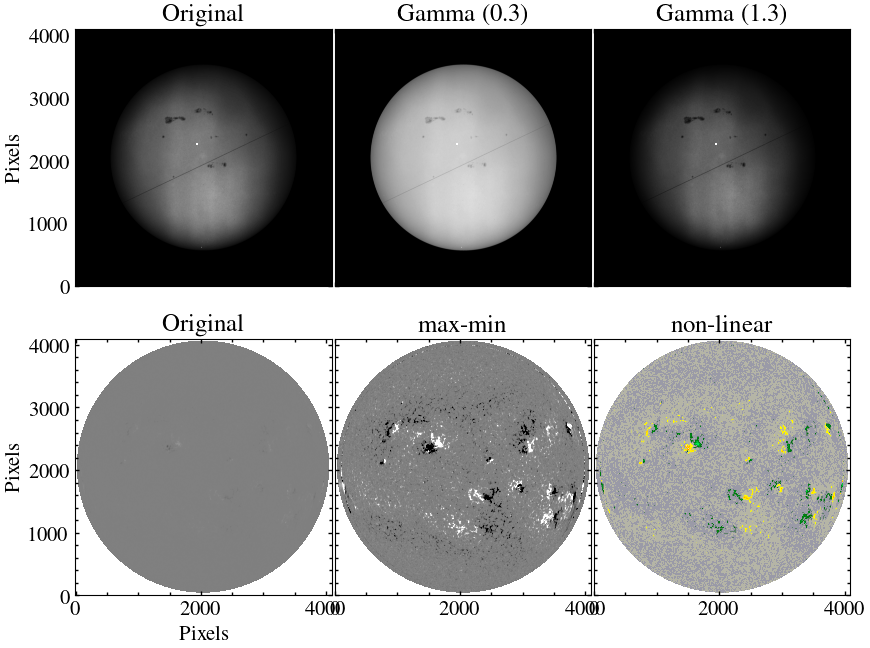

In [7]:
# Gamma Filter

import sunpy.visualization.colormaps
fig, ax = plt.subplots(2, 3, figsize=(10,8), sharey=True, sharex=True)
plt.subplots_adjust(hspace=0.01, wspace=0.01)

ax=  np.array(ax).flatten()


ax[0].imshow(data_wl, origin="lower", cmap="gray")
ax[0].set(ylabel="Pixels", title="Original")

ax[1].imshow(data_wl**0.3, origin="lower", cmap="gray")
ax[1].set(title="Gamma (0.3)")

ax[2].imshow(data_wl**1.3, origin="lower", cmap="gray")
ax[2].set(title="Gamma (1.3)")

ax[3].imshow(data_los, origin="lower", cmap="gray")
ax[3].set(ylabel="Pixels", title="Original", xlabel="Pixels")

ax[4].imshow(data_los, origin="lower", cmap="gray", vmax=100, vmin=-100)
ax[4].set(title="max-min")

ax[5].imshow(data_los, origin="lower", cmap="hmimag")
ax[5].set(title="non-linear")

## Feature Identification<a name="feature"></a>

### What are these features?<a name="features"></a>

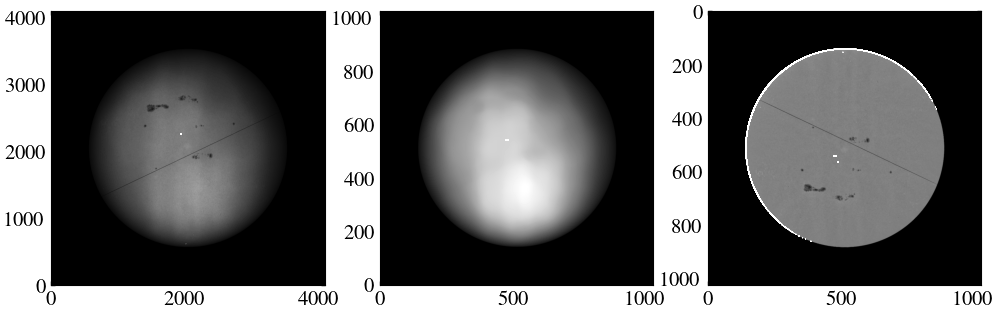

In [54]:
from skimage.filters import median
from skimage.transform import resize, rescale, downscale_local_mean
# Remove Limb Darkening
fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(12,4))
ax1.imshow(data_wl, origin="lower", cmap="gray")

wl_low=downscale_local_mean(data_wl, (4, 4))
md_filter = median(wl_low, np.ones((50,50)))
       
ax2.imshow(md_filter, origin="lower", cmap="gray")

ind = np.where(wl_low != 0)
md_filter[md_filter==0]=1

filterd_im = wl_low/md_filter

ax3.imshow(filterd_im, cmap="gray", vmax=2, vmin=0)

### Feature Identification Technique?<a name="identification"></a>

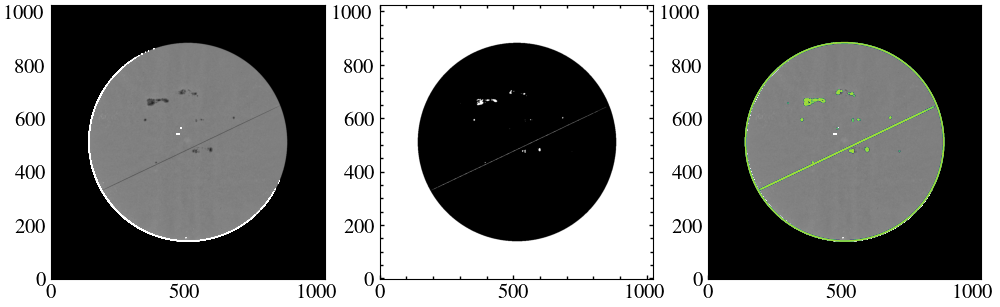

In [118]:
from skimage.measure import label
test_data = filterd_im

mask = np.where(test_data < 0.6, 1, 0)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.imshow(test_data, cmap="gray", vmax=2, vmin=0, origin="lower")
ax2.imshow(mask, cmap="gray", origin="lower")

# ax2.imshow(test_data, cmap="gray", vmax=2, vmin=0, origin="lower")
ax3.imshow(test_data, cmap="gray", origin="lower", vmax=2, vmin=0)
ax3.contour(mask)

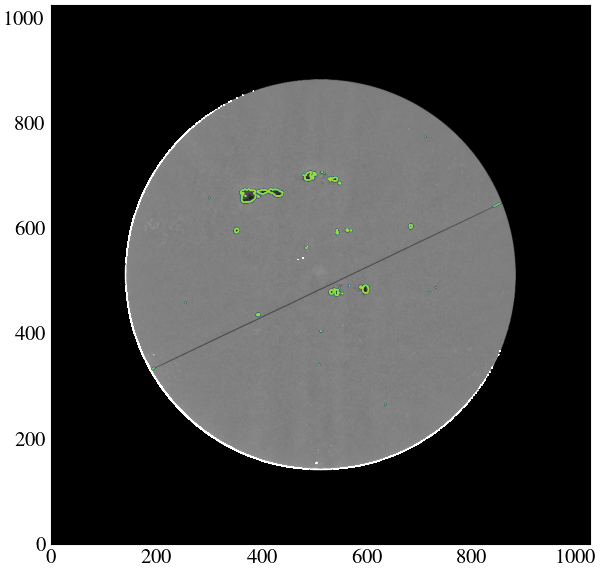

In [255]:
# Remove additional regions
mask = np.where(test_data < 0.7, 1, 0)
labels = label(mask)
hist, loc = np.histogram(labels, np.arange(1, np.max(labels)+1))
argind = np.argsort(hist)
for ii in loc[argind][-2:]:
    ind = np.where(labels==ii)
    mask[ind]=0
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(test_data, cmap="gray", origin="lower", vmax=2, vmin=0)
ax.contour(mask)

/var/folders/hj/q20sy4kn7y74tgmhq593qhm026w837/T/ipykernel_36069/2474533174.py:19: RuntimeWarning: invalid value encountered in sqrt
  z = np.sqrt(Rsq-rho)
/var/folders/hj/q20sy4kn7y74tgmhq593qhm026w837/T/ipykernel_36069/2474533174.py:21: RuntimeWarning: invalid value encountered in sqrt
  mumap = np.sqrt(1.0-(rho/Rsq))


[Text(0.5, 1.0, 'Longitude')]

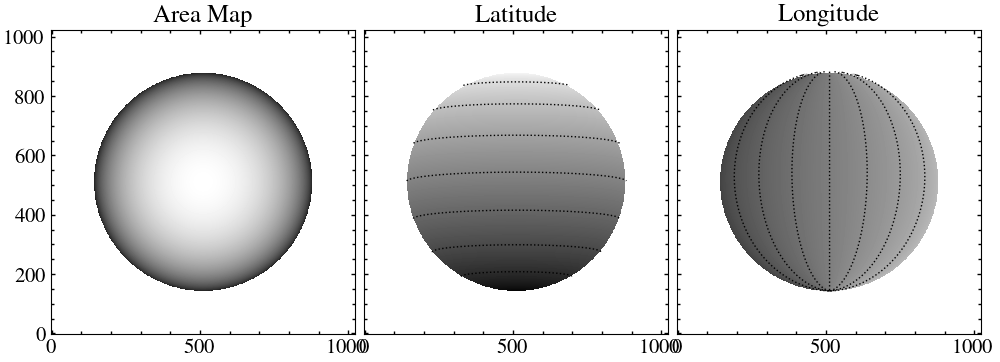

In [227]:
from sunpy.coordinates.sun import B0, P
from astropy.time import Time

t_obs = Time(hdr_wl["DATE-OBS"])
b0 = B0(t_obs).radian
p0 = P(t_obs).radian

fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(12,4), sharey=True)
plt.subplots_adjust(wspace=0.03)
# Loc matrix
x, y = np.meshgrid(np.arange(test_data.shape[0]), np.arange(test_data.shape[1])) 
x, y = x-hdr_wl["CRPIX1"]/4.0, y-hdr_wl["CRPIX2"]/4.0

#Create area map
rho  = x**2 + y**2
Rsq  = (hdr_wl["RADIUS"]/4.0)**2
R    = (hdr_wl["RADIUS"]/4.0)

z = np.sqrt(Rsq-rho)

mumap = np.sqrt(1.0-(rho/Rsq))
ax1.imshow(mumap, origin="lower", cmap="gray")
ax1.set(title="Area Map")

#Creat Latitude Map
# Θ = sin−1 ((y cos B0 + z sin B0) /r) ,
lat = np.rad2deg(np.arcsin((y*np.cos(b0) + z*np.sin(b0))/R))
ax2.imshow(lat, origin="lower", cmap="gray")
ax2.contour(lat, np.arange(-60, 61, 20), colors="black", linestyles=":")
ax2.set(title="Latitude")

#Create Longitude Map
lon = np.rad2deg(np.arctan2(x, z*np.cos(b0)- y*np.sin(b0)))
ax3.imshow(lon, origin="lower", cmap="gray")
ax3.contour(lon, np.arange(-60, 61, 20), colors="black", linestyles=":")
ax3.set(title="Longitude")

In [256]:
labels = label(mask)
width=10
print(f"{'Lev.':<5}{'Lat':>10}{'Lon':>10}{'Area':>10}")
for ii in np.unique(labels)[1:]:
    ind   = np.where(labels == ii)
    if ind[0].size < 10:
        mask[ind]=0
        continue
    _lat  = np.nanmean(lat[ind])
    _lon  = np.nanmean(lon[ind])
    _area = np.nansum(1.0/mumap[ind])
    print(f"{ii:<5}{_lat.round(3):>10}{_lon.round(3):>10}{_area.round(3):>10}")

Lev.        Lat       Lon      Area
7       -16.676   -19.692    20.585
9        -10.31     4.638    68.533
10      -10.156     3.124    51.295
13       -9.286    13.366   145.316
17       -8.746    11.962    13.315
22        7.322     4.792    17.454
23         8.45    -25.97    60.671
24        8.115     7.815    18.647
27        9.785    27.808    39.809
35        19.17   -23.352   698.854
38       20.055   -15.638   424.646
39       22.867     5.933    11.361
40        24.16     4.428    74.571
42       25.079    -4.066   203.686
43       24.363     2.765    16.062
45       25.899    -2.127    27.951


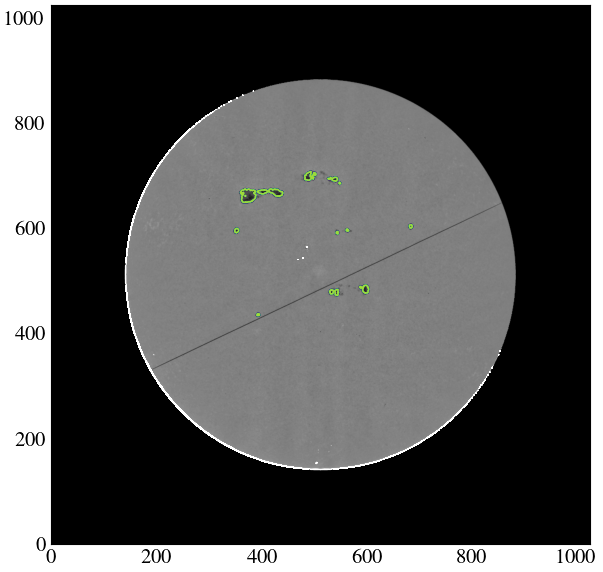

In [257]:
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(test_data, cmap="gray", origin="lower", vmax=2, vmin=0)
ax.contour(mask)